In [57]:
#-*- coding:utf-8 -*-

import pandas as pd
import numpy as np
import numpy
from PIL import Image

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
from datetime import datetime

plt.style.use("ggplot") 


import jieba.analyse
from wordcloud import WordCloud  # 词云包

# import re

import sys
# Python2.5初始化后会删除 sys.setdefaultencoding 这个方法，需要重新载入 
reload(sys)   
sys.setdefaultencoding('utf-8')

font_set = FontProperties(fname=r"Songti.ttc", size=10) 

df = pd.read_excel("playone.xlsx", encoding="utf-8")
df.head()

In [58]:
df.shape

(440, 6)

In [59]:
df.dtypes

comment                 object
comment_time    datetime64[ns]
score                   object
agree_num                int64
user_name               object
is_view                 object
dtype: object

In [60]:
df.describe()

,agree_num
count,440.000000
mean,204.390909
std,819.652258
min,0.000000
25%,0.000000
50%,12.000000
75%,60.250000
max,8628.000000


In [61]:
# 处理缺失值
# df = df.dropna()
# df['comment_time'] = pd.to_datetime(df['comment_time'])

Text(0.5,1,u'\u8c46\u74e3\u7f51\u53cb\u5bf9\u7535\u5f71\u300a\u5934\u53f7\u73a9\u5bb6\u300b\u7684\u8bc4\u5206\u5206\u5e03\u60c5\u51b5')

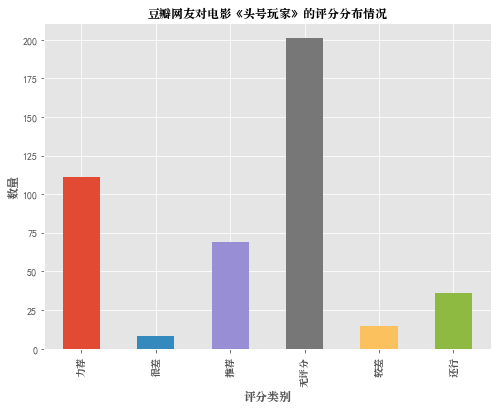

In [62]:
# 五星评分分布情况，由下图可以看出，其中抛开“无评分”，《头号玩家》拿到8.9分是
# 有道理的，大多数豆瓣网友对《头号玩家》的评分为5星，其次为4星，3星，2星，1星

ax = df.groupby('score')['score'].agg(len).plot.bar()
for label in ax.get_xticklabels():
    label.set_fontproperties(font_set)
    
plt.xlabel(u'评分类别',size=12,fontproperties=font_set)
plt.ylabel(u'数量',size=12,fontproperties=font_set)
plt.title(u'豆瓣网友对电影《头号玩家》的评分分布情况',size=12,fontproperties=font_set)

In [63]:
df['score'].value_counts() # 按照数量从大到小输出

无评分    201
力荐     111
推荐      69
还行      36
较差      15
很差       8
Name: score, dtype: int64

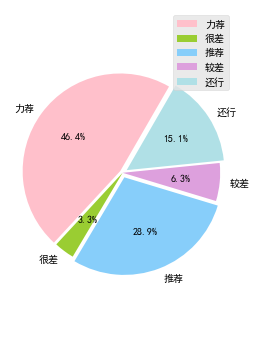

In [64]:
# 筛选掉“无评分”那部分数据，只有isin方法，~表示取反
scorea = ~df['score'].isin([u'无评分'])
a = df[scorea].groupby('score')['score'].agg(len)

plt.figure(figsize=(4,6)) #调节图形大小
labels = [u'力荐',u'很差',u'推荐',u'较差',u'还行'] 
plt.rcParams['font.sans-serif']=['SimHei'] #解决中文乱码
colors = ['pink','yellowgreen','lightskyblue','plum','powderblue']
explode=(0.03,0,0.05,0,0.05) #将饼图分割出来，值越大分割的间隙越大

plt.pie(a, explode=explode, colors=colors, labels=labels, startangle=60,autopct='%1.1f%%')

# x，y轴刻度设置一致，此时的饼图才是圆形
plt.axis('equal')
plt.legend()
plt.show()

In [65]:
# 按照评分类别进行汇总
score_num = df.groupby('score')['score'].agg(len)
score_num

score
力荐     111
很差       8
推荐      69
无评分    201
较差      15
还行      36
Name: score, dtype: int64

In [66]:
df[['score','agree_num']].head(6)

,score,agree_num
0,力荐,8628
1,力荐,7673
2,力荐,5575
3,力荐,5119
4,力荐,4466
5,推荐,3942


In [67]:
# 认为有用的人数最多对应的影评，一般来说，评分打得高说明其对电影的评价比较用心，走心，故而
# 网友对其点赞数最多，所以筛选出评分在5颗星，4颗星以及3颗星对应的影评即可

scorea = df['score'].isin([u'力荐',u'推荐',u'还行'])  # scorea为布尔值

# 只选取影评，认为有用的人数，评分3个字段，按照认为有用的人数从大到小排序，输出前15个
df[['comment','agree_num','score']][scorea].sort_values(by='agree_num',ascending=False)[:10]

,comment,agree_num,score
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,8628,力荐
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,7673,力荐
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,5575,力荐
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,5119,力荐
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,4466,力荐
7,好想在有生之年玩一场全民大战马化腾\n,4039,力荐
5,9。我爱这部电影，就好像我的梦想是能进入马丁·斯科塞斯的《出租车司机》，看罗伯特德尼罗枪杀嫖...,3942,推荐
6,走马观花的IP大赏，剧情人物基本不通，鸡汤也撒得不知所云。适合跟塑料姐妹们一起假嗨\n ...,3845,还行
9,这片讲述了“绿洲五人组”寻找终极彩蛋之旅：第一关告诉你，有时退一步，就是海阔天空；第二关告...,3236,力荐
8,它是你们的情书，我的命。\n,3196,力荐


In [68]:
# 对数据表按comment_time进行升序排列，ascending参数的默认值是True，也就是升序
df.sort_values(['comment_time'],ascending=True)[:6]

,comment,comment_time,score,agree_num,user_name,is_view
234,17年，等死我算了,2014-12-23 15:24:00,无评分,0,AROBTTH,想看
392,这么多导演是几个意思\n \n,2015-01-07 16:03:00,无评分,0,张迪,想看
311,看简介还有导演就想看了~~\n,2015-01-20 18:28:00,无评分,0,橘安,想看
17,唔，华纳没弄来你们的诺神，Steven Spielberg to Direct Sci-F...,2015-03-26 05:26:00,无评分,12,大炎,想看
68,很朋克的感觉，想看。20160304,2016-03-04 17:23:00,无评分,0,浩浩洪流,想看
314,我要是剧透发这 你们会恨我吗\n,2016-05-15 01:02:00,无评分,0,薰华,想看


In [69]:
# 筛选出is_view为“看过”的数据
df[['comment','is_view']][df['is_view']==u'看过'].head()

# 或者 ： df.loc[df['is_view']==u'看过',['comment','is_view']].head()

,comment,is_view
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,看过
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,看过
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,看过
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,看过
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,看过


In [70]:
# 评分时间分布情况，主要是想看看大部分影评是在一天中的哪些时间段发布的
y1 = df['agree_num']
x1 = df['comment_time']
# str(y1)
# stamp = datetime(2011,1,1)
# str(stamp)
# fig,ax = plt.subplots()
# plt.xticks(rotation=70)
# hours = mdates.DateFormatter('%H:%M')
# ax.xaxis.set_major_formatter(hours)
# ax.plot.bar(x1,y1,'r')


In [71]:
comt = df['comment_time']
comment_time = pd.DatetimeIndex(comt).to_native_types() 
comment_time[:5]

array(['2018-03-27 23:02:00', '2018-03-21 17:08:00', '2018-03-28 08:35:00',
       '2018-03-26 23:47:00', '2018-03-21 19:45:00'], dtype=object)

In [72]:
comment_ti = []
for k in range(len(comment_time)):
    comment_ti.append(comment_time[k].split(" ")[1][:2])

df['hour'] =  pd.Series(comment_ti)
df.head()

,comment,comment_time,score,agree_num,user_name,is_view,hour
0,斯皮尔伯格把他对电影的梦想、热心、爱与情怀，浓缩到这部片子，通过极具年代感的经典电影和角色...,2018-03-27 23:02:00,力荐,8628,影志,看过,23
1,游戏宅和影迷的春药！还原《闪灵》那场戏看到要爆炸了！值得去电影院刷十遍！\n,2018-03-21 17:08:00,力荐,7673,翻滚吧！蛋堡,看过,17
2,请不要在彩蛋期间插播电影！（普通导演是在电影期间插播广告，二逼导演是在广告期间插播电影，文...,2018-03-28 08:35:00,力荐,5575,凌睿,看过,08
3,全场喊牛逼！没啥是斯皮尔伯格做不到的了，在一个商业片中把所有的特效情怀和爱结合得完整而彻底...,2018-03-26 23:47:00,力荐,5119,杨欢喜Metiche,看过,23
4,公民凯恩串起了闪灵、鬼娃、高达、哥斯拉、亚基拉、街霸、铁巨人、金刚、龟波气功⋯⋯，加上迪斯...,2018-03-21 19:45:00,力荐,4466,风间隼,看过,19


Text(0.5,1,u'24\u5c0f\u65f6\u8bc4\u8bba\u300a\u5934\u53f7\u73a9\u5bb6\u300b\u7684\u6570\u91cf\u53d8\u5316\u8d8b\u52bf')

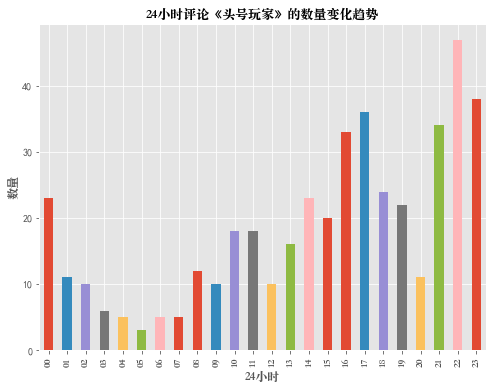

In [73]:
ax = df.groupby('hour')['hour'].agg(len).plot.bar()
for label in ax.get_xticklabels():
    label.set_fontproperties(font_set)
    
plt.xlabel(u'24小时',size=12,fontproperties=font_set)
plt.ylabel(u'数量',size=12,fontproperties=font_set)
plt.title(u'24小时评论《头号玩家》的数量变化趋势',size=13,fontproperties=font_set)

In [74]:
# 凌晨 00:00—6:00
# 上午 6:00—11:00
# 中午 11:00—13:00
# 下午 13:00—16:00
# 傍晚 16:00—18:00
# 晚上 18:00—24:00

# 先将hour字段的数据类型转换为int
df.loc[:,'hour'] = df.loc[:,'hour'].astype('int64')

# 将一天24小时划分为上面6个时间段
hour_group=['00:00—6:00','6:00—11:00','11:00—13:00','13:00—16:00','16:00—18:00','18:00—24:00']

df['time'] = pd.cut(df.hour, bins=[-1,5,10,12,15,17,24], labels=hour_group)
time_df = df.groupby(['is_view','time'])['score'].agg(len).unstack(0)
time_df

is_view,想看,看过
time,,
00:00—6:00,23,35
6:00—11:00,28,22
11:00—13:00,14,14
13:00—16:00,29,30
16:00—18:00,32,37
18:00—24:00,69,107


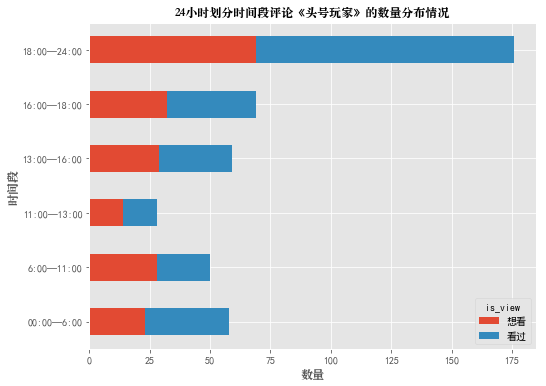

In [75]:
time_df.plot(kind='barh', stacked=True)

plt.xlabel(u'数量',size=12,fontproperties=font_set)
plt.ylabel(u'时间段',size=12,fontproperties=font_set)
plt.title(u'24小时划分时间段评论《头号玩家》的数量分布情况',size=12,fontproperties=font_set)
plt.show()

In [76]:
# 制作词云的函数
def make_wordCloud(comment_df):
    comment_arr = []
    for item in comment_df['comment']:
        comment_arr.append(item)
        
    comments = ''
    for k in range(len(comment_arr)):
        # 将comment_arr[k]字符串化，并去除两边的空格以及换行符
        comments = comments + str(comment_arr[k]).strip().replace("\n", "")

    # 使用正则表达式去除标点符号                  
    # pattern = re.compile(u'[\u4e00-\u9fa5]+')
    # filterdata = re.findall(pattern, comments)
    # comments = ''.join(filterdata)

    # comment = re.sub("[\s+\.\!\/_,$%^*(+\"\‘)]+|[+——()?【】《》<>,“”！，...。？、~@#￥%……&*（）]+".decode("utf8"), "",comments)
    # 使用结巴分词进行中文分词
    seg = jieba.lcut(comments)
    words = pd.DataFrame({'segment': seg})

    # 去掉停用词
    stopwords = pd.read_csv("stopwords.txt", index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8')
    words = words[~words.segment.isin(stopwords.stopword)]

    # 统计词频
    word_stat = words.groupby(by=['segment'])['segment'].agg({"计数":np.size})
    word_stat = word_stat.reset_index().sort_values(by=["计数"], ascending=False)

    # 用词云进行显示
    back_png = numpy.array(Image.open("ba.png"))
    wordcloud = WordCloud(font_path="simhei.ttf",mask=back_png, background_color="white", 
                      max_font_size=80)
    word_frequence = {x[0]: x[1] for x in word_stat.head(1000).values}
    wordcloud = wordcloud.fit_words(word_frequence)
    plt.imshow(wordcloud)
    plt.show()

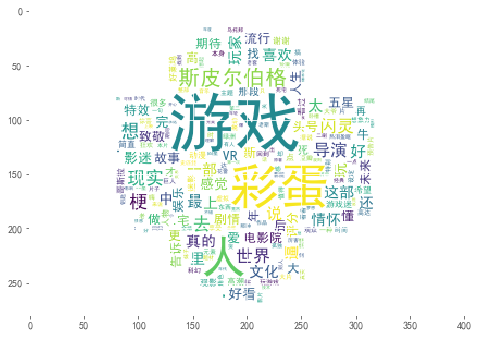

In [77]:
# 总体评分词云
make_wordCloud(df)

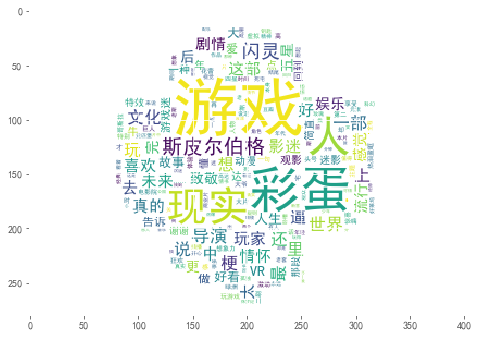

comment    object
dtype: object

In [78]:
# 评分相对不错的词云（包括力荐，推荐，还行）
score_good = df['score'].isin([u'力荐',u'推荐',u'还行'])
comment_good = df[['comment']][score_good]

# import json
# print json.dumps(comment_good.)
make_wordCloud(comment_good)

# 查看类型
comment_good.dtypes

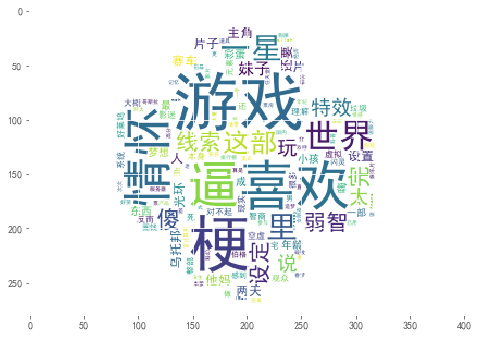

In [79]:
# 评分相对较差的词云（包括较差，很差）
score_bad = df['score'].isin([u'较差',u'很差'])
comment_bad = df[['comment']][score_bad]
make_wordCloud(comment_bad)